 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Find-the-longest-streak-of-'A'-Nucleotide" data-toc-modified-id="Find-the-longest-streak-of-'A'-Nucleotide-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Find the longest streak of 'A' Nucleotide</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Total-'A'-count-per-read" data-toc-modified-id="Total-'A'-count-per-read-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Total 'A' count per read</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Conclusion" data-toc-modified-id="Conclusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Count-DNA-reads-by-pool" data-toc-modified-id="Count-DNA-reads-by-pool-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Count DNA reads by pool</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Demultiplexing" data-toc-modified-id="Demultiplexing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Demultiplexing</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Count-longest-streak-of-'A'-by-the-pool" data-toc-modified-id="Count-longest-streak-of-'A'-by-the-pool-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Count longest streak of 'A' by the pool</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Poly-A-tail-analysis" data-toc-modified-id="Poly-A-tail-analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Poly-A tail analysis</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Consensus-matrix-on-strings-after-poly-A-tail" data-toc-modified-id="Consensus-matrix-on-strings-after-poly-A-tail-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Consensus matrix on strings after poly A tail</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Find-consensus-sequence-(=-artefact)-after-Poly-A-tail" data-toc-modified-id="Find-consensus-sequence-(=-artefact)-after-Poly-A-tail-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Find consensus sequence (= artefact) after Poly A tail</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Error-probability-of-the-base-in-disrupted-polyA-based-on-phred-score" data-toc-modified-id="Error-probability-of-the-base-in-disrupted-polyA-based-on-phred-score-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Error probability of the base in disrupted polyA based on phred score</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Markov-chain-after-PolyA-analysis" data-toc-modified-id="Markov-chain-after-PolyA-analysis-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Markov chain after PolyA analysis</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Error-probability-based-on-phred-score" data-toc-modified-id="Error-probability-based-on-phred-score-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Error probability based on phred score</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Number-of-bases-in-well-barcodes-with-an-error-threshold-&gt;-10^-3" data-toc-modified-id="Number-of-bases-in-well-barcodes-with-an-error-threshold->-10^-3-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Number of bases in well barcodes with an error threshold &gt; 10^-3</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Conclusion" data-toc-modified-id="Conclusion-11.1.1"><span class="toc-item-num">11.1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Number-of-bases-in-UMI-with-an-error-threshold-&gt;-10^-3" data-toc-modified-id="Number-of-bases-in-UMI-with-an-error-threshold->-10^-3-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Number of bases in UMI with an error threshold &gt; 10^-3</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Conclusion" data-toc-modified-id="Conclusion-11.2.1"><span class="toc-item-num">11.2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Number-of-bases-in-pool-barcodes-with-an-error-threshold-&gt;-10^-3" data-toc-modified-id="Number-of-bases-in-pool-barcodes-with-an-error-threshold->-10^-3-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Number of bases in pool barcodes with an error threshold &gt; 10^-3</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Conclusion" data-toc-modified-id="Conclusion-11.3.1"><span class="toc-item-num">11.3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality_Control.ipynb#Cell-barcodes" data-toc-modified-id="Cell-barcodes-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Cell barcodes</a></span></li></ul></div>

# Find the longest streak of 'A' Nucleotide

In [1]:
%reset -f

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
R1_list = !ls /Users/dariapodorskaja/Desktop/Lab/Lane_7_NoIndex_L007_R1*
R1_list = list(R1_list)

In [4]:
# count dna_reads in a file
# open file

dna_reads = []
lines_count = 160000  # number of lines in a file

# make lists of dna reads
for file in R1_list:
    with open(file, 'r') as f:   # f = open(path_to_file, 'r') # f is a variable with a file
        for current_line in range(lines_count):
            if current_line % 4 == 1:  # pick lines with DNA sequences
                s = f.readline()
                s = s.replace('\n', '')
                dna_reads.append(s)
            else:
                next(f)

In [5]:
len(dna_reads)

400000

In [6]:
def size_of_list(my_list):
    """size of my_list in MB"""
    import sys
    return sum([sys.getsizeof(i) for i in my_list]) / 1024 / 1024

In [7]:
def histo(values, plot_title='empty title'):
    """show a histogram based on list"""
    import matplotlib.pyplot as plt

    plt.bar(range(len(values)),values)
    plt.title(plot_title)
    plt.show()


In [8]:
def longest_a_streak(dna):
    """find longest streak of A in a string"""
    counter = 0 
    longest_streak = 0 #variable must be defined
    for base in dna: 
        if base == 'A':
            counter = counter + 1
            if counter > longest_streak:
                longest_streak = counter
        else:
            counter = 0
    return longest_streak

In [9]:
result = list()
for s in dna_reads:
    result.append(longest_a_streak(s))

In [10]:
# create a list with 61 zeroes
longest_a_histo = [0 for i in range(61)]

# add +1 to the correponding position when we see an element
# i.e. if we see element 13 in "result", add +1 to position 13 in "longest_a_histo"
for r in result:
    longest_a_histo[r] += 1

print(longest_a_histo)

[50, 6106, 62289, 26702, 14599, 9449, 8647, 8638, 7625, 8399, 10165, 13048, 15929, 17763, 18980, 18955, 19225, 20180, 20061, 19701, 18003, 15701, 12000, 9001, 6363, 4329, 2791, 1834, 1189, 787, 493, 321, 220, 142, 91, 67, 48, 27, 25, 12, 10, 6, 7, 5, 5, 2, 2, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2]


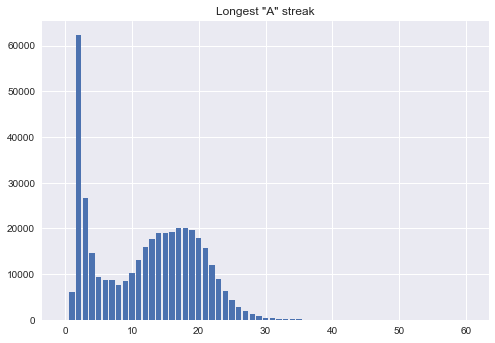

In [11]:
histo(longest_a_histo, 'Longest "A" streak')

## Conclusion
- The most "popular" A streak is of length 2 (it can be found in >6000 reads out of 40k)
- The most common A streak is of length 10-25 


# Total 'A' count per read

In [12]:
result = []
counter_A = 0
for s in dna_reads:
    for base in s:
        if base == 'A':
            counter_A += 1
    result.append(counter_A)
    counter_A = 0

In [13]:
total_a = [0 for i in range(61)]
for r in result:
    total_a[r] += 1

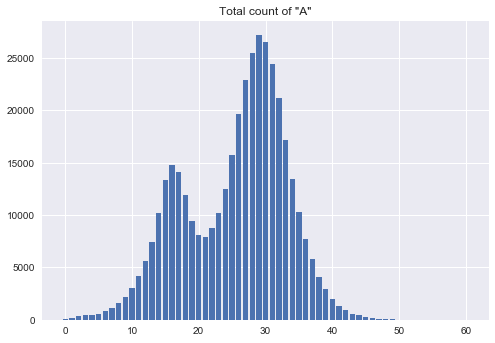

In [14]:
histo(total_a, plot_title='Total count of "A"')

## Conclusion
- We expect to have 25% of A. 

- More than 20 bases per read are encountered in {{suspicious_reads}}% of all reads


# Count DNA reads by pool 

In [15]:
d = {
'ACAG': 0,
'AGTC': 0,
'ATCA': 0,
'CATG': 0,
'CTAC': 0,
'TCTA': 0,
'TGAT': 0,
'TTGG': 0,
'unknown': 0
}

# # or we can create this dict ourselves
# pools = ['ACAG', 'AGTC', 'ATCA', 'CATG', 'CTAC', 'TCTA', 'TGAT', 'TTGG', 'unknown']
# {pool: 0 for pool in pools}

In [16]:
for read in dna_reads:
    pool = read[3:7]
    if pool in d.keys():
        d[pool] += 1
    else:
        d['unknown'] += 1

In [17]:
print(d)

{'ACAG': 63064, 'AGTC': 70542, 'ATCA': 58141, 'CATG': 66798, 'CTAC': 72654, 'TCTA': 27, 'TGAT': 12, 'TTGG': 56581, 'unknown': 12181}


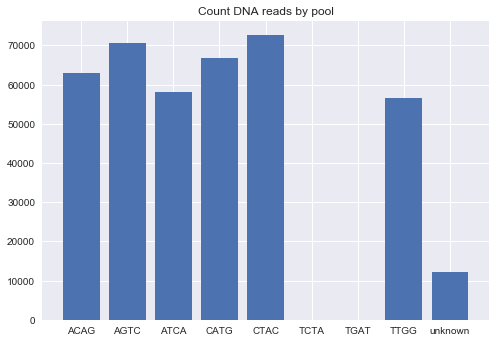

In [18]:
# order in a dict is not guaranteed, so we may get weird results
plt.bar(range(len(d.keys())),d.values())
plt.xticks(range(len(d)), list(sorted(d.keys())))
plt.title('Count DNA reads by pool')
plt.show()

## Conclusion
- 2 given pools from the wet lab were not found 

# Demultiplexing


In [19]:
def hamming_distance(dna1, dna2):
    assert isinstance(dna1, str)
    assert isinstance(dna2, str)

    distance = 0
    for b1, b2 in zip(dna1, dna2):
        if b1 != b2:
            distance += 1
    return distance

assert hamming_distance('AAAA', 'unknown') == 4

In [20]:
def pool_correction(read_pool, list_of_pools, max_ham_dist = 1):
    """compare given pool against list of pools and correct it"""
    assert isinstance(read_pool, str)
    assert isinstance(list_of_pools, list)
    for p in list_of_pools:
        dist = hamming_distance(p, read_pool)
        if dist == 0:
            return p
        elif dist <= max_ham_dist:
            return p
    return 'unknown'

pools = ['ACAG', 'AGTC', 'ATCA', 'CATG', 'CTAC', 'TCTA', 'TGAT', 'TTGG', 'unknown']
assert pool_correction('ACAT', pools) == 'ACAG'
assert pool_correction('TTGG', pools) == 'TTGG'
assert pool_correction('MMMM', pools) == 'unknown'
assert pool_correction('ACTA', pools, max_ham_dist=2) == 'ACAG'

In [21]:
# 1 initialize dict
# 2 add corrected pools
# 3 plot

import plotly.plotly as py
import plotly.graph_objs as go

data = list()
for hamming_dist in range(3):
    d = {
    'ACAG': 0,
    'AGTC': 0,
    'ATCA': 0,
    'CATG': 0,
    'CTAC': 0,
    'TCTA': 0,
    'TGAT': 0,
    'TTGG': 0,
    'unknown': 0
    }


    for read in dna_reads:
        pool = read[3:7]
        pool = pool_correction(pool, pools, hamming_dist)
        d[pool] += 1
    keys, values = zip(*d.items())

    trace = go.Bar(
        x=keys,
        y=values,
        name='Hamming distance of ' + str(hamming_dist)
    )
    data.append(trace)

#     plot_from_dict(d, plot_title= "Hamming distance of " + str(hamming_dist))
py.iplot(data, filename = 'basic-line')

# Count longest streak of 'A' by the pool

In [22]:
pools = ['ACAG', 'AGTC', 'ATCA', 'CATG', 'CTAC', 'TCTA', 'TGAT', 'TTGG', 'unknown']

# create a dictionary with keys as strings from pools and for values empty list with 61 zeroes
d = {k: list(0 for i in range(61)) for k in pools}

In [23]:
for read in dna_reads:
    pool = read[3:7]
    longest_a_streak_in_pool = longest_a_streak(read)
    lst_61_zeroes = d[pool] if pool in d.keys() else d['unknown']
    lst_61_zeroes[longest_a_streak_in_pool] += 1

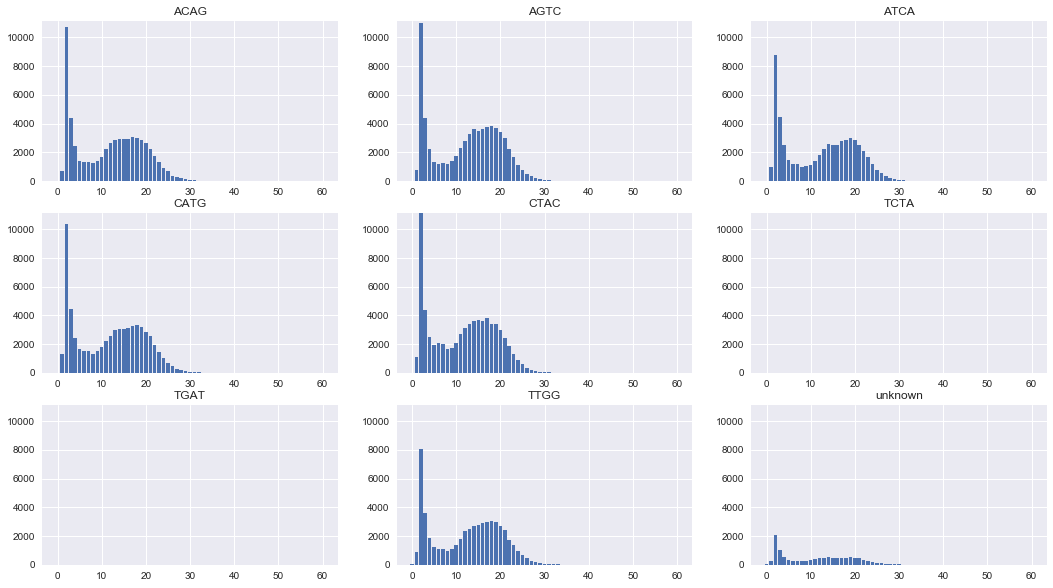

In [24]:
from itertools import product
graph_position = list(product(range(3), range(3)))

dim = {'x': 3, 'y': 3}
f, axarr = plt.subplots(dim['x'], dim['y'], figsize=(18, 10))

max_y_value = max(max(i) for i in d.values())


for coordinates, d_pool in zip(graph_position, d.items()):
    i, j = coordinates
    k, v = d_pool
    axarr[i, j].bar(range(len(v)),v)
    axarr[i, j].set_title(k)
    axarr[i, j].set_ylim([0, max_y_value])

plt.show()

# Poly-A tail analysis

In [25]:
def after_polyatail(read, next_n_bases=5, min_len_poly_a=8):
    """
    if a poly A tail length is grater than min_len_poly_a
    go to the end of the tail
    and return next n bases
    """
    counter_a = 0
    bases_after_poly_a = str()
    for index, base in enumerate(read):
        if base == 'A':
            counter_a += 1
        else:
            if counter_a > min_len_poly_a:
                bases_after_poly_a = read[index:index + next_n_bases]
            counter_a = 0
    return bases_after_poly_a

In [26]:
assert after_polyatail("AAAAAAAAAAAAAAAAAAAAAATCCCCCCCCCCCC") == 'TCCCC'
assert after_polyatail("ACACAT") == ''

In [27]:
from collections import Counter

for i in range(1,11):
    after_a = list()
    for read in dna_reads:
        s = after_polyatail(read, i)
        if s != '': # read didn't have min polyA tail -> returns ''
            after_a.append(s)
    print(Counter(after_a).most_common(6))


[('C', 120470), ('G', 66058), ('T', 58409), ('N', 78)]
[('CC', 48237), ('CA', 33626), ('TC', 20765), ('CG', 19927), ('GC', 19702), ('GG', 18671)]
[('CCC', 23352), ('CAA', 13052), ('CCA', 10946), ('CAC', 10251), ('GAA', 9573), ('GGG', 8346)]
[('CCCC', 11955), ('CAAA', 6502), ('GAAA', 5855), ('CCCA', 4592), ('CCAA', 4115), ('GGGG', 4050)]
[('CCCCC', 6257), ('GAAAA', 3760), ('CAAAA', 3507), ('GGGGG', 2147), ('CCCCA', 2042), ('CCCCG', 2035)]
[('CCCCCC', 3071), ('GAAAAA', 2372), ('CAAAAA', 2076), ('GGGGGG', 1199), ('CCCCCG', 1142), ('CCCCCA', 1035)]
[('GAAAAAA', 1427), ('CCCCCCC', 1371), ('CAAAAAA', 1239), ('GGGGGGG', 673), ('CCCCCCG', 609), ('C', 553)]
[('GAAAAAAA', 827), ('CAAAAAAA', 623), ('CCCCCCCC', 580), ('C', 553), ('CAAAAAAC', 368), ('T', 366)]
[('C', 553), ('GAAAAAAAA', 367), ('T', 366), ('G', 298), ('GAAAAGAAA', 263), ('CAAAAAAAA', 259)]
[('C', 553), ('T', 366), ('G', 298), ('CC', 229), ('GAAAAGAAAA', 213), ('CA', 197)]


# Consensus matrix on strings after poly A tail

In [28]:
# create a matrix with 5 rows and 10 columns, where every element is 0
matrix = [[0 for i in range(10)] for i in range(5)]
matrix

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [29]:
after_a = list()
for read in dna_reads:
    s = after_polyatail(read, 10)
    if s != '': # read didn't have min polyA tail -> returns ''
        after_a.append(s)

In [30]:
for s in after_a:
    for index, base in enumerate(s):
        if base == 'A':
            matrix[0][index] += 1
        elif base == 'C':
            matrix[1][index] += 1
        elif base == 'T':
            matrix[2][index] += 1
        elif base == 'G':
            matrix[3][index] += 1
        elif base == 'N':
            matrix[4][index] += 1
        else:
            print("Unexpected letter")

In [31]:
import pandas
df = pandas.DataFrame(matrix)
df.rename({0: 'A', 1: 'C', 2: 'T', 3: 'G', 4: 'N'})

# # as an alternative we can generate dict for .rename() ourselves
# alphabet = 'ACTGN'
# {k: v for k, v in zip(range(len(alphabet)), alphabet)}

,0,1,2,3,4,5,6,7,8,9
A,0,61354,67567,68487,63294,60598,58231,61707,63178,68591
C,120470,88708,82638,78448,77615,69974,57444,57971,50768,47102
T,58409,42135,39354,40527,41075,46060,53118,47852,51151,48655
G,66058,51550,52896,53719,58009,62088,68607,68608,69650,68967
N,78,48,58,64,63,45,37,25,30,24


# Find consensus sequence (= artefact) after Poly A tail

In [32]:
rotated_after_a = [''.join(s) for s in zip(*after_a)] 
# e.g reads = ['AATC','ACTGA','ATG'] -> reads = ['AAA', ACT', 'TTG', 'CG', 'A' ]

In [33]:
# zip functions can be applied only to the lists of strings of the same lengh.
# If the string is shorter than the string with max length -> add space to the string
max_length = (len(max(after_a, key=len)))


for index, s in enumerate(after_a):
    if len(s) != max_length:  # if len of current string is not the same as maximum length
             after_a[index] = s + ' ' * ( max_length - len(s) ) 

after_a_rotated = ([''.join(s) for s in zip(*after_a)])

In [34]:
# count the number of each nucleotide in each column
a_list = []
t_list = []
g_list = []
c_list = []
n_list = []


for read in after_a_rotated:
    a_list.append( read.count( 'A' ))
    t_list.append( read.count( 'T' ))
    g_list.append( read.count( 'G' ))
    c_list.append( read.count( 'C' ))
    n_list.append( read.count( 'N' ))

In [35]:
# define an artefact based on consensus

data = list((zip(a_list, t_list, g_list, c_list, n_list)))
#1st tuple 1st column from the reads

d = {0:'A', 1:'T', 2:'G', 3:'C', 4:'N'}
artefact = str()
for line in data:
    max_value = max( line ) # find max value in current line
    index_of_max_value = line.index( max_value )  # find index of max value in current line
    artefact += d[index_of_max_value]
print( artefact )
    
    

CCCCCCGGGG


# Error probability of the base in disrupted polyA based on phred score 

In [85]:
def base_calling_error_probabilities(ascii_code):
    assert isinstance(ascii_code, str)
    assert len(ascii_code) == 1
    q = ord(ascii_code) - 33
    p = round(10 ** (-q / 10), 5)
    return p

In [86]:
def disrupted_poly_A(read,min_len_poly_a=8, min_len_poly_a2 = 5):
    """
    find poly A tail in a read that is disrupted only by one base other than 'A'
    
    """
    import re
    
    min_len_poly_a = str(min_len_poly_a)
    min_len_poly_a2 = str(min_len_poly_a2)
    pattern = "[A]{" + min_len_poly_a + ",}([^A])[A]{" + min_len_poly_a2 + ",}"
    m = re.search(pattern, read)  
    if m:
        return m.span(1)[0]
    return ''

In [87]:
from collections import namedtuple
phred_data = namedtuple('PhredData', 'ReadNumber PositionOfBase ErrorProb')
n=160000
result = []
path_to_file = '/Users/dariapodorskaja/Desktop/Lab/Lane_7_NoIndex_L007_R1_001.fastq'
with open(path_to_file, 'r') as f:   # f = open(path_to_file, 'r') # f is a variable with a file
    for line_number in range(n):
        if line_number %4 ==1:
            s = f.readline().replace('\n', '')
            position = disrupted_poly_A(s)
            read_number = line_number
        elif line_number %4 ==3 and position != '':
            s = f.readline().replace('\n', '')
            p = base_calling_error_probabilities(s[position])
            result.append(phred_data(read_number, position, p))
        else:
            next(f)

In [93]:
threshold = 0.5 #min error probability
print(sum([1 for rn, pos, prob in result if prob > threshold]))

end_result = list()
for r in result:
    rn, pos, prob = r
    if prob > threshold:
        (r)


111
PhredData(ReadNumber=285, PositionOfBase=20, ErrorProb=0.63096)
PhredData(ReadNumber=1805, PositionOfBase=33, ErrorProb=0.63096)
PhredData(ReadNumber=1909, PositionOfBase=20, ErrorProb=0.63096)
PhredData(ReadNumber=2229, PositionOfBase=20, ErrorProb=0.63096)
PhredData(ReadNumber=4109, PositionOfBase=27, ErrorProb=0.63096)
PhredData(ReadNumber=4373, PositionOfBase=49, ErrorProb=0.63096)
PhredData(ReadNumber=4669, PositionOfBase=20, ErrorProb=0.63096)
PhredData(ReadNumber=4973, PositionOfBase=20, ErrorProb=0.63096)
PhredData(ReadNumber=5113, PositionOfBase=20, ErrorProb=0.63096)
PhredData(ReadNumber=6625, PositionOfBase=20, ErrorProb=0.63096)
PhredData(ReadNumber=6685, PositionOfBase=20, ErrorProb=0.63096)
PhredData(ReadNumber=7249, PositionOfBase=49, ErrorProb=0.63096)
PhredData(ReadNumber=8361, PositionOfBase=43, ErrorProb=0.63096)
PhredData(ReadNumber=13373, PositionOfBase=27, ErrorProb=0.63096)
PhredData(ReadNumber=13685, PositionOfBase=29, ErrorProb=0.63096)
PhredData(ReadNumber

# Markov chain after PolyA analysis

In [40]:
def after_polyatail(read, next_n_bases=10, min_len_poly_a=8):
    """
    if a poly A tail length is grater than min_len_poly_a
    go to the end of the tail
    and return next n bases
    """
    assert isinstance(read, str)
    counter_a = 0
    bases_after_poly_a = str()
    for index, base in enumerate(read):
        if base == 'A':
            counter_a += 1
        else:
            if counter_a >= min_len_poly_a:
                bases_after_poly_a = read[index:index + next_n_bases]
            counter_a = 0
    return bases_after_poly_a

In [41]:
reads=[]
for dna in dna_reads:
    reads.append(after_polyatail(dna, 4, 3))

In [42]:
from itertools import product
alphabet = 'ACTGN'
# let's do all possible transisions
trans = [i+j for i, j in product(alphabet, alphabet)]  # possible transitions

In [43]:
# now lets do a dict where all initial values are 0
d = {k: 0 for k in trans}
print(d)

{'AA': 0, 'AC': 0, 'AT': 0, 'AG': 0, 'AN': 0, 'CA': 0, 'CC': 0, 'CT': 0, 'CG': 0, 'CN': 0, 'TA': 0, 'TC': 0, 'TT': 0, 'TG': 0, 'TN': 0, 'GA': 0, 'GC': 0, 'GT': 0, 'GG': 0, 'GN': 0, 'NA': 0, 'NC': 0, 'NT': 0, 'NG': 0, 'NN': 0}


In [44]:
# always take next 2 letters
result= []
for read in dna_reads:
    for i in range(len(read)):
        result.append((read[i: i+2]))

In [45]:
result[0:10]

['GC', 'CA', 'AT', 'TT', 'TG', 'GG', 'GA', 'AA', 'AA', 'AA']

In [46]:
# now combine this 2 letters with dict
# that means if we see 2 letters, add +1 to coresponding enty in the dict
for two_letters in result:
    if two_letters in d.keys():
        d[two_letters] += 1

In [47]:
print(d)

{'AA': 5812313, 'AC': 1615101, 'AT': 952776, 'AG': 1704025, 'AN': 527, 'CA': 1813380, 'CC': 1044646, 'CT': 1101885, 'CG': 958200, 'CN': 314, 'TA': 587587, 'TC': 1334364, 'TT': 953373, 'TG': 945421, 'TN': 207, 'GA': 1888594, 'GC': 925788, 'GT': 825327, 'GG': 1133393, 'GN': 258, 'NA': 540, 'NC': 274, 'NT': 219, 'NG': 278, 'NN': 1210}


In [48]:
total_transitions_to_a = 0
total_transitions_to_c = 0
total_transitions_to_t = 0
total_transitions_to_g = 0
total_transitions_to_n = 0

for k in d.keys():
    if k.startswith('A'):
        total_transitions_to_a += d[k]
    elif k.startswith('C'):
        total_transitions_to_c += d[k]
    elif k.startswith('T'):
        total_transitions_to_t += d[k]
    elif k.startswith('G'):
        total_transitions_to_g += d[k]
    elif k.startswith('N'):
        total_transitions_to_n += d[k]
    else:
        print("we missed a key!")
        

In [49]:
a_prob = []
c_prob = []
t_prob = []
g_prob = []
n_prob = []

for k in trans:
    if k.startswith('A'):
        a_prob.append((d[k] / total_transitions_to_a))
    elif k.startswith('C'):
        c_prob.append((d[k] / total_transitions_to_c))
    elif k.startswith('T'):
        t_prob.append((d[k] / total_transitions_to_t))
    elif k.startswith('G'):
        g_prob.append((d[k] / total_transitions_to_g))
    elif k.startswith('N'):
        n_prob.append((d[k] / total_transitions_to_n))
    else:
        print("we missed a key!")

In [50]:
matrix = [[0 for i in range(len(alphabet))] for i in range(len(alphabet))]
for i in range(len(alphabet)):
    matrix [0][i] = round(a_prob[i], 2)
    matrix [1][i] = round(c_prob[i], 2)
    matrix [2][i] = round(t_prob[i], 2)
    matrix [3][i] = round(g_prob[i], 2)
    matrix [4][i] = round(n_prob[i], 2)
    
matrix

[[0.58, 0.16, 0.09, 0.17, 0.0],
 [0.37, 0.21, 0.22, 0.19, 0.0],
 [0.15, 0.35, 0.25, 0.25, 0.0],
 [0.4, 0.19, 0.17, 0.24, 0.0],
 [0.21, 0.11, 0.09, 0.11, 0.48]]

In [51]:
import pandas as pd
alphabet = ['A', 'C', 'T', 'G', 'N']
df = pd.DataFrame(matrix, index=alphabet, columns=alphabet)
df

,A,C,T,G,N
A,0.58,0.16,0.09,0.17,0.00
C,0.37,0.21,0.22,0.19,0.00
T,0.15,0.35,0.25,0.25,0.00
G,0.40,0.19,0.17,0.24,0.00
N,0.21,0.11,0.09,0.11,0.48


# Error probability based on phred score 

In [52]:
def reader(path_to_file, start=0, stop=60, every_line_number=1):
    lines_count = 160000
    strings = list()
    with open(path_to_file, 'r') as f:
        for current_line in range(lines_count):
            if current_line % 4 == every_line_number:  # pick lines with DNA sequences
                s = f.readline().replace('\n', '')
                strings.append(s[start:stop])
            else:
                next(f)
    return strings

In [53]:
def map_string_to_probabilities(string):
    """takes a list of ascii symbols 
    returns correspodning probabilities in a list"""
    
    assert isinstance (string, str)
    
    errors = list()
    for letter in string:
        errors.append(base_calling_error_probabilities(letter))
    return errors

In [54]:
def number_of_errors_above_thershold(errors, threshold = 0.001):
    """takes a list of lists floats and 
    returns how many numbers in a list above threshold
    
    Example:
    >>> number_of_errors_above_thershold([[.1, .2], [.2, .3]], threshold=.2)
    [1, 2, 3]
    """
    assert isinstance (errors, list)
    [isinstance(i, list) for i in errors]
    
    err = list()
    for lst in errors:
        counter = 0 
        for i in lst:
            if i >= threshold:
                counter += 1
        if counter > 0:
            err.append(counter)
    return err

assert number_of_errors_above_thershold([[.1, .2], [.2, .3]], threshold=.2) == [1,2]
assert number_of_errors_above_thershold([[.1, .2], [.2, .3]], threshold=.5) == []

In [55]:
def number_of_suspicious_strings(ascii_list):
    """
    return how many strings has at least one letter which error probability is above threashold
    """
    error = list()
    for element in ascii_list:
        error.append(map_string_to_probabilities(element))
    a = number_of_errors_above_thershold(error)
    return len(a)

In [56]:
R1_list = !ls /Users/dariapodorskaja/Desktop/Lab/Lane_7_NoIndex_L007_R1*
R1_list = list(R1_list)
R2_list = !ls /Users/dariapodorskaja/Desktop/Lab/Lane_7_NoIndex_L007_R2*
R2_list = list(R2_list)

## Number of bases in well barcodes with an error threshold > 10^-3

In [57]:
path_to_file = R2_list
wells_errors = list()
total_well_errors = list()
for file in path_to_file:
    wells_ascii = reader(file, start=0, stop=6, every_line_number=3)
    wells = reader(file, start=0, stop=6, every_line_number=1)
    wells_errors.append((number_of_suspicious_strings(wells_ascii)))
    total_well_errors = sum(wells_errors)
print(total_well_errors)

52177


### Conclusion
Based on analysis of 400.000 reads with total 2 400.000 bases that belong to well barcodes there are {{total_well_errors}}({{total_well_errors/400000}}% out of total number) bases in well barcodes with an error probability > 0.001

## Number of bases in UMI with an error threshold > 10^-3 

In [58]:
path_to_file = R2_list
umi_errors = list()
total_umi_errors = list()
for file in path_to_file:
    umi_ascii = reader(file, start=6, stop=12, every_line_number=3)
    umi = reader(file, start=6, stop=12, every_line_number=1)
    umi_errors.append((number_of_suspicious_strings(umi_ascii)))
    total_umi_errors = sum(umi_errors)
print(total_umi_errors)

38322


### Conclusion
Based on analysis of 400.000 reads with total 2 400.000 bases that belong to UMI there are {{total_umi_errors/400000}} % out of total number) bases in UMI with an error probability > 0.001

## Number of bases in pool barcodes with an error threshold > 10^-3

In [59]:
path_to_file = R1_list
pools_errors = list()
total_pools_errors = list()
for file in path_to_file:
    pools_ascii = reader(file, start=3, stop=7, every_line_number=3)
    pools = reader(file, start=7, stop=12, every_line_number=1)
    pools_errors.append((number_of_suspicious_strings(pools_ascii)))
    total_pools_errors = sum(pools_errors)
print(total_pools_errors)

20615


### Conclusion
Based on analysis of 400.000 reads with total 1 600.000 bases that belong to pool barcodes there are {{total_pools_errors}} ({{total_pools_errors/400000}} out of total number) bases in pool barcodes with an error probability > 0.001

# Cell barcodes

In [60]:
path_to_file = R1_list

all_reads = list()
for file in R1_list:
    all_reads.extend((reader(file, start=0, stop=60, every_line_number=1)))



In [61]:
size_of_list(all_reads)

41.5802001953125

In [62]:
path_to_file = R1_list

pools = list()

for file in R1_list:
    pool = reader(file, start=3, stop=7, every_line_number=1)
    pools.extend(pool)
print(len(pools))

400000


In [63]:
path_to_file = R2_list

wells = list()

for file in R2_list:
    well = reader(file, start=0, stop=6, every_line_number=1)
    wells.extend(well)
print(len(wells))

400000


In [64]:
cell_barcodes = list()
for a,b in zip(pools,wells):
    cell_barcodes.append(a+b)

In [65]:
from collections import Counter
# print(Counter(cell_barcodes).most_common(1152))

In [66]:
cell_barcodes_unique = set(cell_barcodes)

In [67]:
len(cell_barcodes_unique)

21427

In [68]:
cell_barcodes[0]

'TTGGGACNNN'

In [69]:
import pandas as pd
import numpy as np

In [70]:
# count dna_reads in a file
# open file
pools = ['ACAG', 'AGTC', 'ATCA', 'CATG', 'CTAC', 'TCTA', 'TGAT', 'TTGG', 'unknown']
R1_list = !ls /Users/dariapodorskaja/Desktop/Lab/Lane_7_NoIndex_L007_R1*
R1_list = list(R1_list)
path_to_file = R1_list
dna_reads = []
lines_count = 160000  # number of lines in 10 files

list_streak = list()
list_count = list()
list_pool = list()
list_corrected_pool = list()
list_after_polyA = list()

# make lists of dna reads
for file in path_to_file:
    with open(file, 'r') as f:   # f = open(path_to_file, 'r') # f is a variable with a file
        for current_line in range(lines_count):
            if current_line % 4 == 1:  # pick lines with DNA sequences
                s = f.readline()
                s = s.replace('\n', '')
                
                pool = s[3:7]
                list_streak.append(longest_a_streak(s))
                list_count.append(s.count('A'))
                list_pool.append(pool)
                list_corrected_pool.append(pool_correction(pool, pools))
                list_after_polyA.append(after_polyatail(s))
            else:
                next(f)

In [71]:
# define empty pandas dataframe with column names
df = pd.DataFrame(columns=('streakA', 'countA', 'pool_barcode', 'corrected_pool', 'well_barcode', 'cell_barcode'))
# df.streakA = df.streakA.astype('int')
# df.countA = df.countA.astype('int')
# df.pool = df.pool.astype('str')
# df.corrected_pool = df.corrected_pool.astype('str')

# add to pandas dataframe
df.streakA = list_streak
df.countA = list_count
df.pool_barcode = list_pool
df.corrected_pool = list_corrected_pool
df.well_barcode = wells
df.cell_barcode = cell_barcodes

In [72]:
df.head()

,streakA,countA,pool_barcode,corrected_pool,well_barcode,cell_barcode
0,15,28,TTGG,TTGG,GACNNN,TTGGGACNNN
1,2,16,ATCA,ATCA,GTAACT,ATCAGTAACT
2,2,17,ACAG,ACAG,CGCCCC,ACAGCGCCCC
3,19,31,AGTC,AGTC,GATATC,AGTCGATATC
4,14,29,ACAG,ACAG,ACGGTC,ACAGACGGTC


In [73]:
df = df.head(n=200)

In [74]:
df

,streakA,countA,pool_barcode,corrected_pool,well_barcode,cell_barcode
0,15,28,TTGG,TTGG,GACNNN,TTGGGACNNN
1,2,16,ATCA,ATCA,GTAACT,ATCAGTAACT
2,2,17,ACAG,ACAG,CGCCCC,ACAGCGCCCC
3,19,31,AGTC,AGTC,GATATC,AGTCGATATC
4,14,29,ACAG,ACAG,ACGGTC,ACAGACGGTC
5,13,23,AGTC,AGTC,CAACTC,AGTCCAACTC
6,17,29,AGTC,AGTC,AGGATC,AGTCAGGATC
7,4,12,CTAC,CTAC,TGCTGA,CTACTGCTGA
8,16,31,ATCA,ATCA,CTTGGT,ATCACTTGGT
9,2,18,CTAC,CTAC,GGGGGT,CTACGGGGGT


In [75]:
df = pd.DataFrame(index=cell_barcodes, columns=('pool_barcode', 'well_barcode', ))
df.pool_barcode = list_pool
df.well_barcode = wells
df.head()


,pool_barcode,well_barcode
TTGGGACNNN,TTGG,GACNNN
ATCAGTAACT,ATCA,GTAACT
ACAGCGCCCC,ACAG,CGCCCC
AGTCGATATC,AGTC,GATATC
ACAGACGGTC,ACAG,ACGGTC


In [76]:
# for pool,p in df.groupby(by="corrected_pool"):
#     p.streakA.plot(kind='bar')
    
# #plt.legend()
# p.streakA.plot(kind='bar')

In [77]:
# %matplotlib inline
# df.streakA.hist(by=df.corrected_pool)

In [78]:
# df1 = df.loc[:,['streakA', 'corrected_pool']]
# fig, ax = plt.subplots()

# for pool,p in df1.groupby(by="corrected_pool"):
#     p.plot(label=pool, alpha=.75, ax=ax)

# ax.legend()

In [79]:
# df.head()

In [80]:

# fig, ax = plt.subplots(10, figsize=(20,30))

# for i, (pool,p) in enumerate(df.groupby(by="corrected_pool")):
#     ax[i].hist(p.streakA, label=pool)
# plt.legend();